In [1]:
# 01_data_loading.ipynb

# Author: Eryk Urbański
# Date: April 2025
# Description: Load raw EEG data and convert to MNE format for further processing.

# Import packages and tools

In [1]:
import pandas as pd
import numpy as np
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci

import pickle
import sys
sys.path.append("../src")
from vis import plot_eeg, plot_eeg_with_time

# import os
# os.environ["MNE_DATA"] = "E:\\mne_data" # Adjust as needed

# Load built-in data

In [2]:
subjects = [1]  # may vary
runs = [4]  # may vary
raw_fnames = eegbci.load_data(subjects, runs)
raws = [read_raw_edf(f, preload=True) for f in raw_fnames]

raw = concatenate_raws(raws) # concatenate runs from subject
eegbci.standardize(raw) # make channel names follow standard conventions

Extracting EDF parameters from E:\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


In [3]:
raw.info['sfreq']

160.0

In [4]:
eegbci_data, eegbci_times = raw[:]
eegbci_ch_names = raw.ch_names
# eegbci_data.shape, eegbci_times.shape, eegbci_ch_names

In [5]:
datasets = []

eegbci_dataset = {
    "name": "eegbci",
    "data": eegbci_data,
    "times": eegbci_times,
    "ch_names": eegbci_ch_names
}
datasets.append(eegbci_dataset)

# Data exploration

In [7]:
data, times = eegbci_data, eegbci_times # data: channels x time ; times: time x 1
print(data.shape, times.shape)

(64, 20000) (20000,)


In [8]:
data_df = pd.DataFrame(data.T, columns=raw.ch_names)
data_df.head(5)

,FC5,FC3,FC1,FCz,FC2,FC4,FC6,C5,C3,C1,...,P8,PO7,PO3,POz,PO4,PO8,O1,Oz,O2,Iz
0,-0.000005,0.000002,0.000037,0.000039,0.000030,0.000026,-0.000016,-0.000014,0.000004,0.000018,...,-0.000021,-0.000008,-0.000035,-0.000045,-0.000066,-0.000039,-0.000033,-0.000048,-0.000039,-0.000039
1,-0.000012,-0.000024,0.000001,-0.000002,-0.000015,-0.000022,-0.000055,-0.000036,-0.000027,-0.000025,...,-0.000050,-0.000040,-0.000068,-0.000065,-0.000084,-0.000052,-0.000021,-0.000042,-0.000031,-0.000034
2,-0.000077,-0.000078,-0.000059,-0.000065,-0.000063,-0.000055,-0.000067,-0.000088,-0.000071,-0.000065,...,-0.000017,-0.000022,-0.000050,-0.000035,-0.000048,-0.000018,-0.000020,-0.000042,-0.000029,-0.000027
3,-0.000066,-0.000067,-0.000050,-0.000065,-0.000060,-0.000055,-0.000068,-0.000062,-0.000053,-0.000054,...,-0.000039,-0.000060,-0.000078,-0.000064,-0.000068,-0.000041,-0.000044,-0.000062,-0.000034,-0.000043
4,-0.000045,-0.000055,-0.000033,-0.000053,-0.000054,-0.000063,-0.000083,-0.000052,-0.000050,-0.000053,...,-0.000044,-0.000055,-0.000070,-0.000054,-0.000063,-0.000037,-0.000060,-0.000070,-0.000034,-0.000045


In [9]:
print(np.max(data_df.values), np.min(data_df.values))

0.0005949999999999999 -0.000376


In [14]:
print(np.var(data_df.values))

2.862586963452148e-09


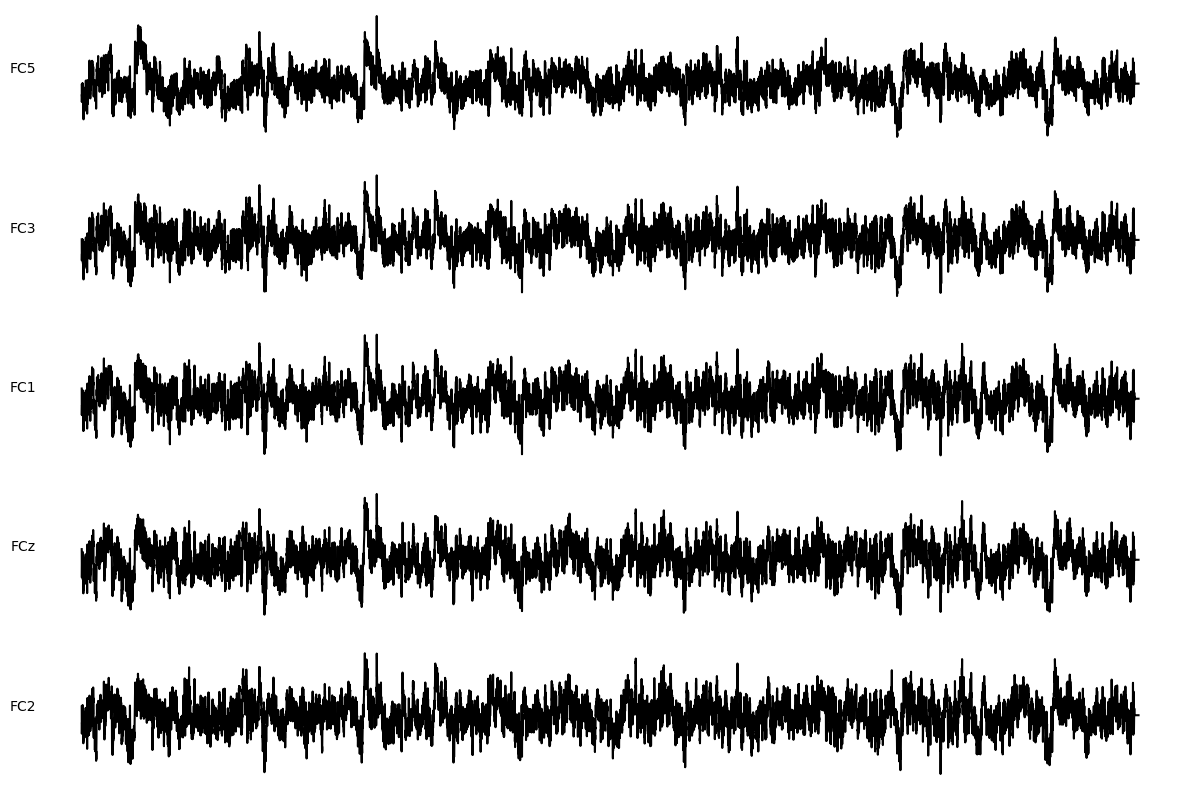

In [10]:
plot_eeg(data_df, n_channels_to_plot=5)

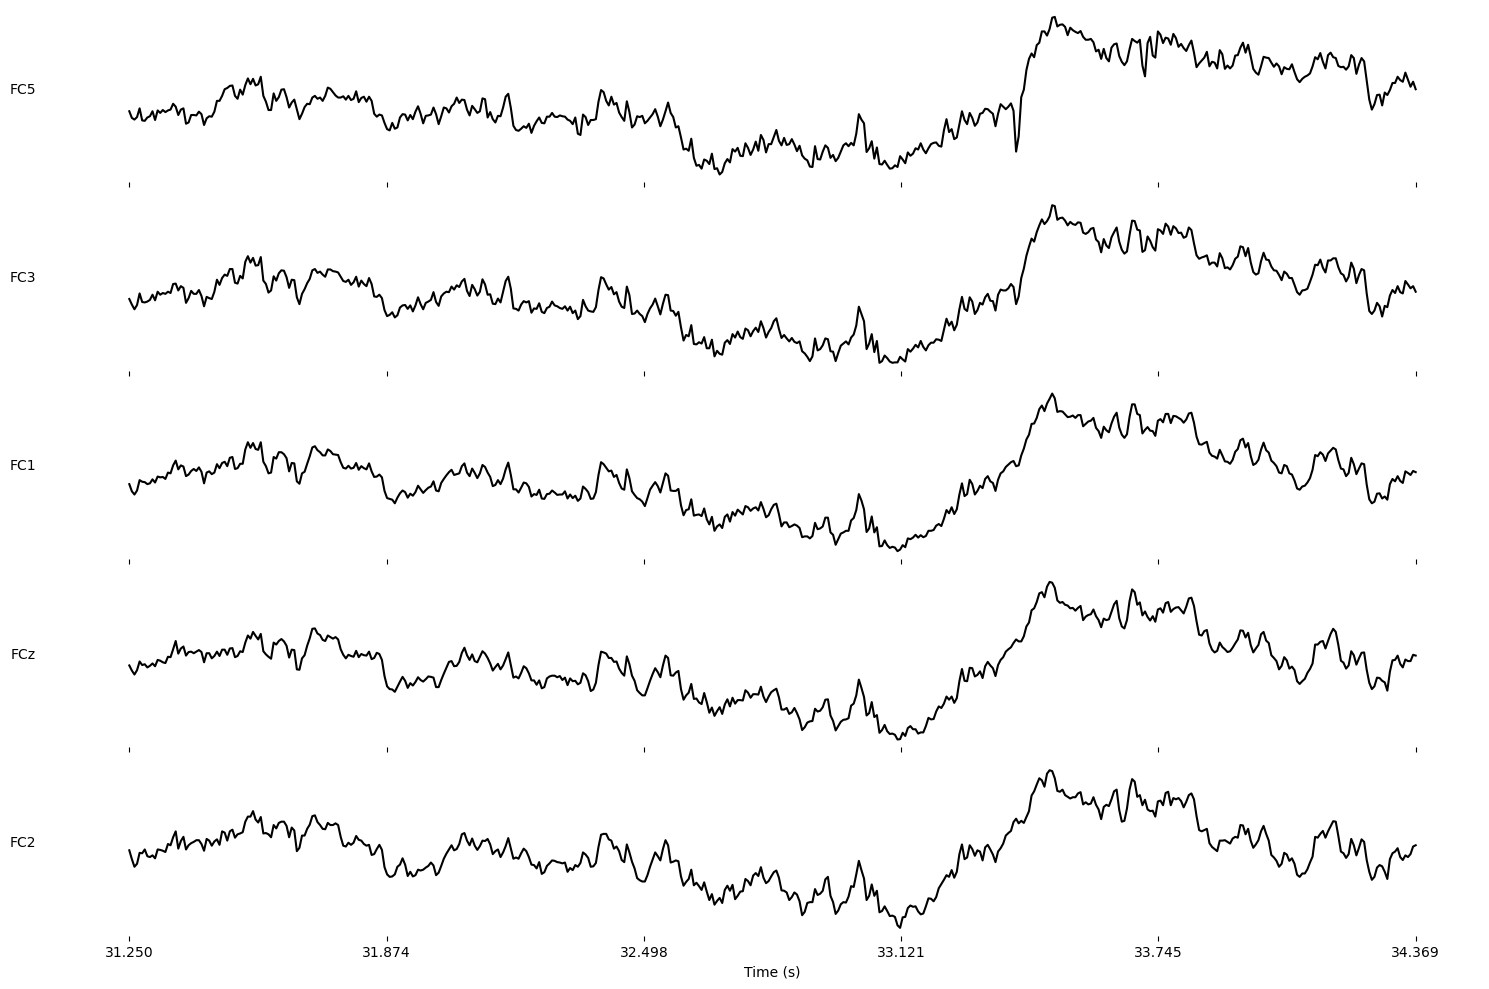

In [11]:
plot_time = range(5000,5500)
plot_eeg_with_time(data_df.iloc[plot_time,:], times=times[plot_time], n_channels_to_plot=5) 

# Save data to pkl

In [13]:
with open("../data/eeg_datasets.pkl", "wb") as f:
    pickle.dump({"datasets": datasets}, f)